# Implementing Linear Regression from Scratch

In this notebook, we will walk through the step-by-step implementation of a simple linear regression model from scratch using Python. Linear regression is a fundamental technique in machine learning and statistics that models the relationship between a dependent variable and one or more independent variables. Our goal is to build a basic understanding of how linear regression works and create a functional model without relying on external libraries.

## Table of Contents

1. [Introduction to Linear Regression](#introduction)
2. [Data Preparation](#data-preparation)
3. [Model Implementation](#model-implementation)
4. [Training the Model](#training-the-model)
5. [Making Predictions](#making-predictions)
6. [Evaluation](#evaluation)

## Introduction to Linear Regression <a name="introduction"></a>

Linear regression aims to find the best-fitting linear relationship between the input variables (features) and the target variable. The equation of a simple linear regression model is given by:

$$
y = mx + b
$$

Where:
- \(y\) is the target variable
- \(x\) is the input feature
- \(m\) is the slope of the line
- \(b\) is the y-intercept

Our objective is to determine the values of \(m\) and \(b\) that minimize the difference between the predicted \(y\) and the actual \(y\) (known as residuals).


In [33]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn import datasets

## Data Preparation <a name="data-preparation"></a>

Before building our model, we need to prepare the dataset. For this example, we'll generate synthetic data to demonstrate the implementation. In a real-world scenario, you would use actual data.


## Model Implementation <a name="model-implementation"></a>

Let's implement the linear regression model step by step:

### 1. Initialize Parameters

We start by initializing the parameters \(m\) and \(b\) with random values or zeros.

### 2. Calculate Predictions

We calculate the predicted values 

$$
y_{\text{pred}}
$$ 

using the linear equation 
$$
y_{\text{pred}} = mx + b\
$$

### 3. Compute Loss

The loss (error) is the difference between the predicted values and the actual target values.

### 4. Update Parameters

We update the parameters \(m\) and \(b\) using gradient descent to minimize the loss.

### 5. Repeat

Steps 2 to 4 are repeated iteratively for a specified number of epochs or until convergence.


In [34]:
class LinearRegression:
    """
    An implementation of the Linear Regression algorithm 
    using gradient descent via the NumPy library
    """
    def __init__(self, learning_rate=1e-3, n_iterations=1000):
        self.lr = learning_rate 
        self.n_iterations = n_iterations
        self.weights = None 
        self.bias = None 
    def fit(self, X, y):
        """
        Function used to train the LinerRegression classifier
        """
        n_samples, n_features = X.shape 

        # Initialize weights and bias parameters 
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Apply Gradient Descent 
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias 

            # Calculate Gradients 
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias parameters 
            self.weights -= self.lr * dw 
            self.bias -= self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias 
        return y_predicted 

## Training the Model <a name="training-the-model"></a>

Now, we will train our linear regression model using the prepared dataset. We'll apply gradient descent to update the parameters and minimize the loss.

In [35]:
# Generate a Regression Dataset
X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=20, random_state=4)

# Perform a split of training and testing data with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 4
)

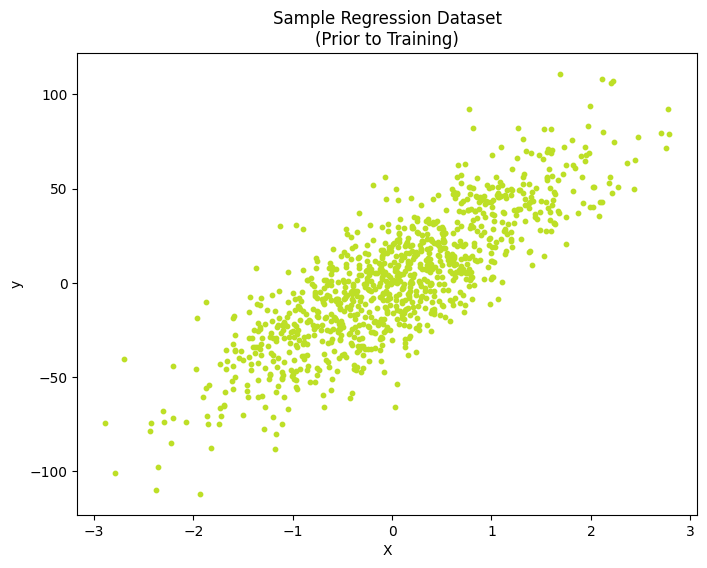

In [36]:
# Visualize the Dataset prior to Training
cmap = plt.get_cmap("viridis")
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, color=cmap(0.9), s=10)
ax.set_title('Sample Regression Dataset\n(Prior to Training)')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.show()

In [37]:
# Train a LinearRegression Classifier
clf = LinearRegression(learning_rate=1e-3, n_iterations=10000)
clf.fit(X_train, y_train)

## Making Predictions <a name="making-predictions"></a>

After training the model, we can make predictions on new, unseen data points using the learned parameters \(m\) and \(b\).

In [38]:
# Generate Predictions from the Fitted Model
predictions = clf.predict(X_test)

## Evaluation <a name="evaluation"></a>

To evaluate our model's performance, we can calculate metrics such as mean squared error (MSE) or R-squared. These metrics help us assess how well the model fits the data.

In [41]:
def mean_squared_error(y_true, y_pred):
    """
    Helper function to determine the 
    mean squared error (MSE) from the 
    trained model's predictions vs. actuals
    """
    return np.mean((y_true - y_pred)**2)

def r2_score(y_true, y_pred):
    """ 
    Helper function to determine the 
    R^2 score from the trained model's 
    predictions vs. actuals
    """
    correlation_coef = np.corrcoef(y_true, y_pred)
    corr = correlation_coef[0, 1]
    return corr ** 2

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

accuracy = r2_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Mean Squared Error: 284.019470647534
Accuracy: 0.7235240070600203


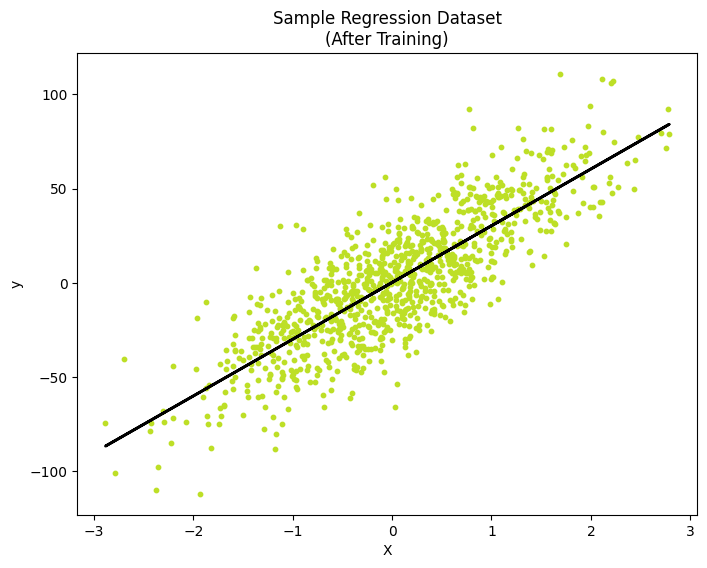

In [40]:
# Visualize the Model's Ability to Fit the Linear Data
y_pred_line = clf.predict(X)
cmap = plt.get_cmap("viridis")
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, color=cmap(0.9), s=10)
ax.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
ax.set_title('Sample Regression Dataset\n(After Training)')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.show()

## Conclusion

In this notebook, we've successfully implemented a simple linear regression model from scratch. We've covered the fundamental steps of data preparation, model implementation, training, prediction, and evaluation. This exercise provides a solid foundation for understanding the inner workings of linear regression and serves as a starting point for more complex regression techniques and machine learning models.